In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## The data scraping process:
- I scrap the data at 3 different time stamp over the day
- I can only see the availability of the day I check (so If U check on the day 18, I only see the availability on day 18)
- The data was collect over the course of one week
- Since the data was only cover 1 week, it may subject to bias, but the week I scrapped data was an ordinary week (not exam week, not holiday,...)

In [23]:
test = pd.read_csv('./library_data/library_schedule_10_10_12.csv')
test.head(5)

# the day is actually pretty useless, since it's only a week, so we will probably work on the day of week instead of date.

,checking_hour,hour,day_of_week,date,room,status
0,12,12:00pm,Monday,October 10,257,Unavailable
1,12,12:15pm,Monday,October 10,257,Unavailable
2,12,12:30pm,Monday,October 10,257,Unavailable
3,12,12:45pm,Monday,October 10,257,Unavailable
4,12,1:00pm,Monday,October 10,257,Unavailable


In [24]:
import glob
import os

files = os.path.join('library_data', "*.csv")

files = glob.glob(files)
df = pd.concat(map(pd.read_csv, files), ignore_index=True)


In [25]:
from dateutil import parser

df.date = df.date.map(lambda x: parser.parse(x).strftime('%d-%m-%Y'))



In [26]:
new_hour = []
for hour in df.hour:
    if len((hour.split(':')[0]))==1:
        hour = str(0) + hour
        print(hour)
    else:
        print(hour)
    new_hour.append(hour)

12:00pm
12:15pm
12:30pm
12:45pm
01:00pm
01:15pm
01:30pm
01:45pm
02:00pm
02:15pm
02:30pm
02:45pm
03:00pm
03:15pm
03:30pm
03:45pm
04:00pm
04:15pm
04:30pm
04:45pm
05:00pm
05:15pm
05:30pm
05:45pm
06:00pm
06:15pm
06:30pm
06:45pm
07:00pm
07:15pm
07:30pm
07:45pm
08:00pm
08:15pm
08:30pm
08:45pm
09:00pm
09:15pm
09:30pm
09:45pm
10:00pm
10:15pm
10:30pm
10:45pm
11:00pm
11:15pm
11:30pm
11:45pm
12:00pm
12:15pm
12:30pm
12:45pm
01:00pm
01:15pm
01:30pm
01:45pm
02:00pm
02:15pm
02:30pm
02:45pm
03:00pm
03:15pm
03:30pm
03:45pm
04:00pm
04:15pm
04:30pm
04:45pm
05:00pm
05:15pm
05:30pm
05:45pm
06:00pm
06:15pm
06:30pm
06:45pm
07:00pm
07:15pm
07:30pm
07:45pm
08:00pm
08:15pm
08:30pm
08:45pm
09:00pm
09:15pm
09:30pm
09:45pm
10:00pm
10:15pm
10:30pm
10:45pm
11:00pm
11:15pm
11:30pm
11:45pm
12:00pm
12:15pm
12:30pm
12:45pm
01:00pm
01:15pm
01:30pm
01:45pm
02:00pm
02:15pm
02:30pm
02:45pm
03:00pm
03:15pm
03:30pm
03:45pm
04:00pm
04:15pm
04:30pm
04:45pm
05:00pm
05:15pm
05:30pm
05:45pm
06:00pm
06:15pm
06:30pm
06:45pm
07:00pm


In [27]:
new_hour = pd.to_datetime(new_hour).strftime("%H:%M")

In [28]:
df['hour'] = new_hour.copy()
df = df.sort_values(by='date')
df

,checking_hour,hour,day_of_week,date,room,status
18710,0,23:45,Sunday,09-10-2022,520D,Available
18510,0,22:45,Sunday,09-10-2022,358,Available
18511,0,23:00,Sunday,09-10-2022,358,Available
18512,0,23:15,Sunday,09-10-2022,358,Available
18513,0,23:30,Sunday,09-10-2022,358,Available
...,...,...,...,...,...,...
16725,12,21:00,Sunday,16-10-2022,520D,Available
16726,12,21:15,Sunday,16-10-2022,520D,Available
16727,12,21:30,Sunday,16-10-2022,520D,Available
16718,12,19:15,Sunday,16-10-2022,520D,Available


In [29]:
# for some reasons I got checking hour 0, it may be a small mistake
df = df[~(df.checking_hour == 0)]

In [30]:
# write the csv to save it
df.reset_index(drop=True).to_csv('library_dataset.csv',index=False)

### Read the csv

In [31]:

df = pd.read_csv('library_dataset.csv')


In [32]:
df.checking_hour.unique()

array([ 6, 12, 16], dtype=int64)

## Data preprocessing

So, I'll see which day has the most available room when you check it at 6am in the morning

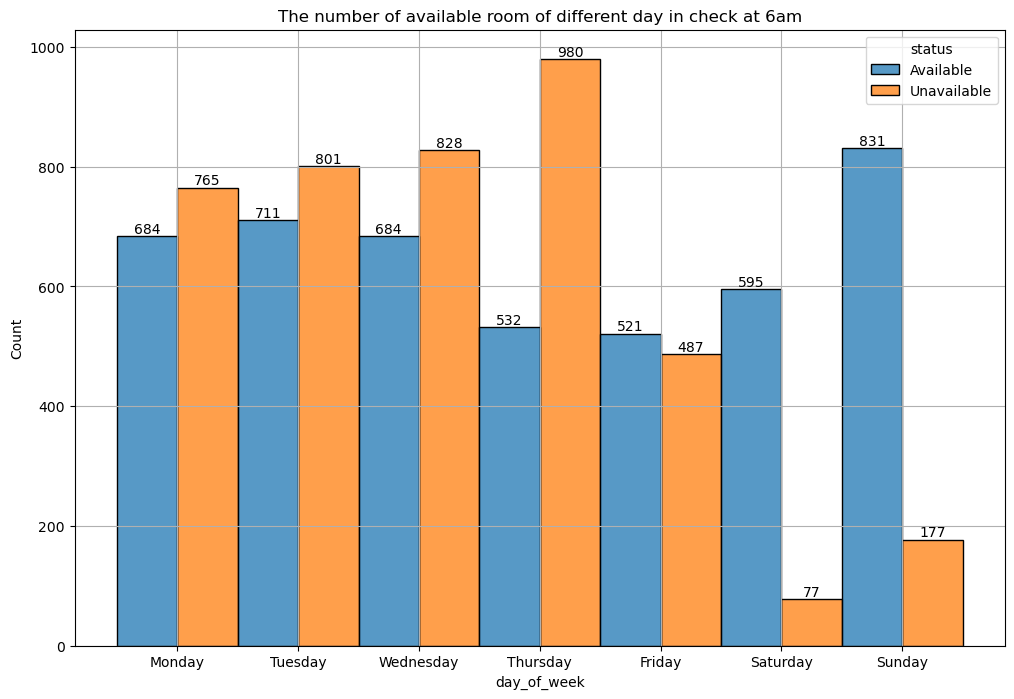

In [33]:
fig,ax = plt.subplots(figsize = (12,8))
sns.histplot( data = df[df.checking_hour == 6], x="day_of_week",
                                                stat='count', hue = 'status', multiple='dodge',
                                                ax=ax,hue_order=['Available', 'Unavailable'])

for container in ax.containers:
    ax.bar_label(container)

plt.title("The number of available room of different day in check at 6am")
plt.grid()
plt.show()

# Clearly, there is a different between weekdays and weekend, when almost half of the number of room has already been booked at 6am on weekday, 
# there are plenty of rooms available on Friday and weekend -> quite understandable 

C:\Users\minht\AppData\Local\Temp\ipykernel_2404\177274299.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_1.set_xticklabels(labels=df.day_of_week.unique(),rotation = 90)
C:\Users\minht\AppData\Local\Temp\ipykernel_2404\177274299.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_2.set_xticklabels(labels=df.day_of_week.unique(),rotation = 90)


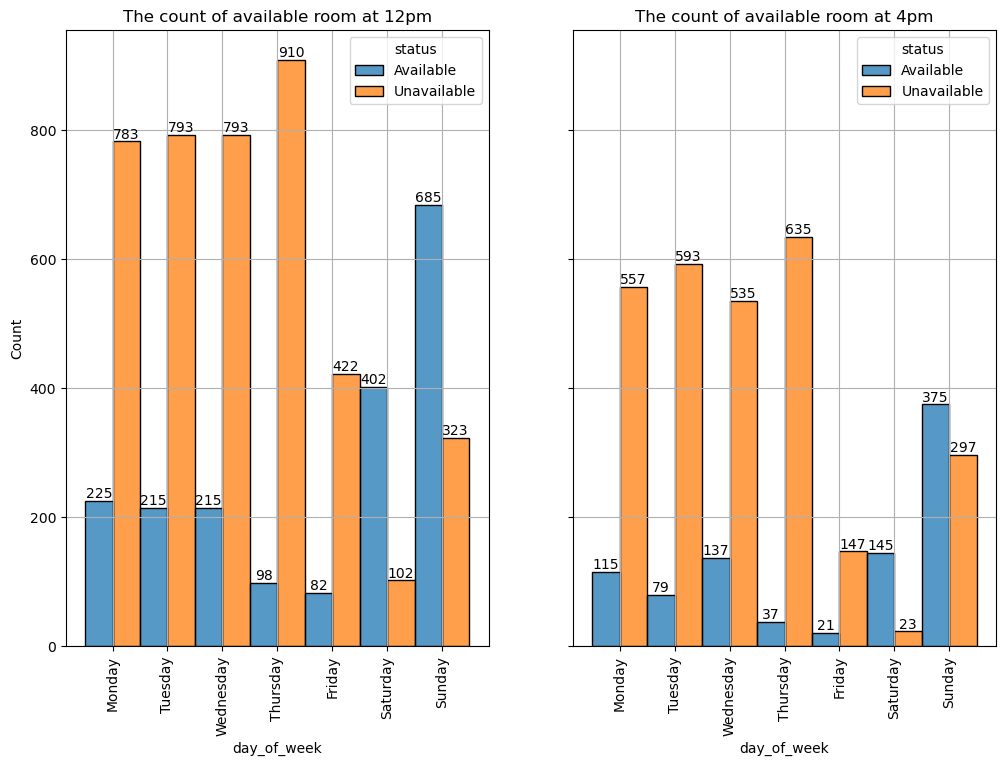

In [34]:
# Let see how this change when we move to 12pm and 4pm

from cProfile import label


fig,(ax_1, ax_2) = plt.subplots(ncols=2,figsize = (12,8), sharey=True)
sns.histplot( data = df[df.checking_hour == 12], x="day_of_week", stat='count',
             hue = 'status', multiple='dodge', ax=ax_1, hue_order=['Available', 'Unavailable'])

for container in ax_1.containers:
    ax_1.bar_label(container)


sns.histplot( data = df[df.checking_hour == 16], x="day_of_week",
             stat='count', hue = 'status', multiple='dodge', ax=ax_2, hue_order=['Available', 'Unavailable'])

for container in ax_2.containers:
    ax_2.bar_label(container)

ax_1.set_title("The count of available room at 12pm")
ax_1.set_xticklabels(labels=df.day_of_week.unique(),rotation = 90)
ax_1.grid()

ax_2.set_title("The count of available room at 4pm")
ax_2.set_xticklabels(labels=df.day_of_week.unique(),rotation = 90)
ax_2.grid()


plt.show()

# The most drastic change is that Sartuday/ Sunday has been booked quite alot -> so the weekend also got booked, students just don't like
# booked early hour on weekend (or they don't want to wake up early to booked)

# As you can see, the total amount of Available + Unavailable have changed, that is because when it's 7am, for example, then 6am would
# completely disappear (neither available or unavailable), and since I only scrap 3 times, it's hard to tell whether they got booked 
# between 6am and 12pm or not.

In [35]:
# So, I'll visualize the percentage of available and unavailable and compare between those number for a better conclusion

available_df = pd.DataFrame(columns=["day_of_week",'checking_hour','available_count', 'unavailable_count', 'total'])

i = 0
for day_of_week in df.day_of_week.unique():
    for hour in df.checking_hour.unique():
        available_cnt = len(df[(df.day_of_week == day_of_week) & (df.status == "Available") &(df.checking_hour == hour)])
        unavailable_cnt = len(df[(df.day_of_week == day_of_week) & (df.status == "Unavailable")  &(df.checking_hour == hour)])
        total = available_cnt + unavailable_cnt
        available_df.loc[i] =[day_of_week,hour ,available_cnt, unavailable_cnt, total]
        i += 1

available_df['percent'] = round( available_df.available_count/available_df.total * 100,2)


In [36]:
available_df['percent_available'] = round((available_df.available_count / available_df.total) * 100,2)
available_df.head(5)

,day_of_week,checking_hour,available_count,unavailable_count,total,percent,percent_available
0,Monday,6,684,765,1449,47.20,47.20
1,Monday,12,225,783,1008,22.32,22.32
2,Monday,16,115,557,672,17.11,17.11
3,Tuesday,6,711,801,1512,47.02,47.02
4,Tuesday,12,215,793,1008,21.33,21.33


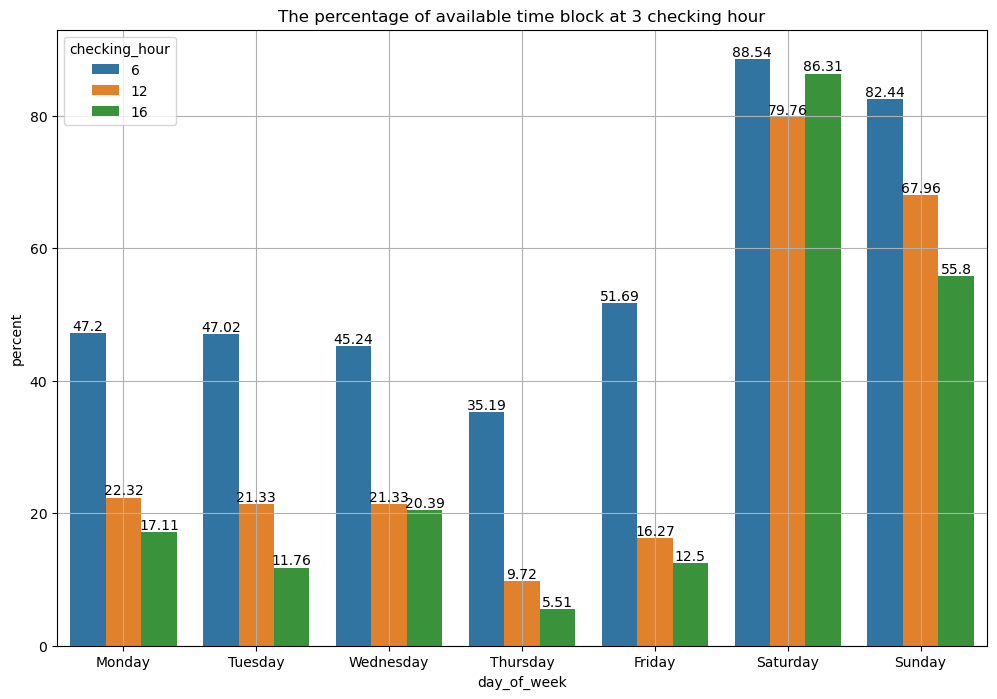

In [37]:
fig,ax = plt.subplots(figsize = (12,8))

sns.barplot(data=available_df, x = 'day_of_week',y='percent', ax= ax,hue='checking_hour',orient='v')

for container in ax.containers:
    ax.bar_label(container)

plt.title("The percentage of available time block at 3 checking hour")
plt.grid()
plt.show()

# as you can see, the percent of available room at 06:00 is quite stable over the weekday
# the percent of available room at 12:00 and 16:00 is fluctuate a bit, 
# The weekday has pretty low available percentage even at 06:00, and it goes down quite fast

# The weekend is a bit more lax, with more available rooms to begin with, and most of them still available through the day

In [38]:
str(df.hour.unique()[0].split(":")[0])+":"+"00"

'12:00'

In [39]:
# Since there are too many time block (15min block), I'm gonna add a column for 1 hour block
df["one_hour_time"] = (df.hour.map(lambda x: str(x.split(":")[0] +":"+"00")))
df

,checking_hour,hour,day_of_week,date,room,status,one_hour_time
0,6,12:00,Monday,10-10-2022,436,Unavailable,12:00
1,6,12:15,Monday,10-10-2022,436,Unavailable,12:00
2,6,15:00,Monday,10-10-2022,436,Unavailable,15:00
3,6,11:30,Monday,10-10-2022,436,Unavailable,11:00
4,6,12:30,Monday,10-10-2022,436,Unavailable,12:00
...,...,...,...,...,...,...,...
18412,12,21:00,Sunday,16-10-2022,520D,Available,21:00
18413,12,21:15,Sunday,16-10-2022,520D,Available,21:00
18414,12,21:30,Sunday,16-10-2022,520D,Available,21:00
18415,12,19:15,Sunday,16-10-2022,520D,Available,19:00


In [40]:
hour_comprise_df = df.copy()

In [41]:
hour_comprise_df = hour_comprise_df.groupby(by=["one_hour_time","status"])['status'].count().unstack().reset_index()

hour_comprise_df['percent_available'] = round((hour_comprise_df.Available / (hour_comprise_df.Available + hour_comprise_df.Unavailable) * 100),2)

In [42]:
hour_comprise_df

status,one_hour_time,Available,Unavailable,percent_available
0,06:00,349,8,97.76
1,07:00,409,11,97.38
2,08:00,399,21,95.00
3,09:00,329,91,78.33
4,10:00,313,191,62.10
5,11:00,185,319,36.71
6,12:00,314,862,26.70
7,13:00,297,879,25.26
8,14:00,337,839,28.66
9,15:00,314,862,26.70


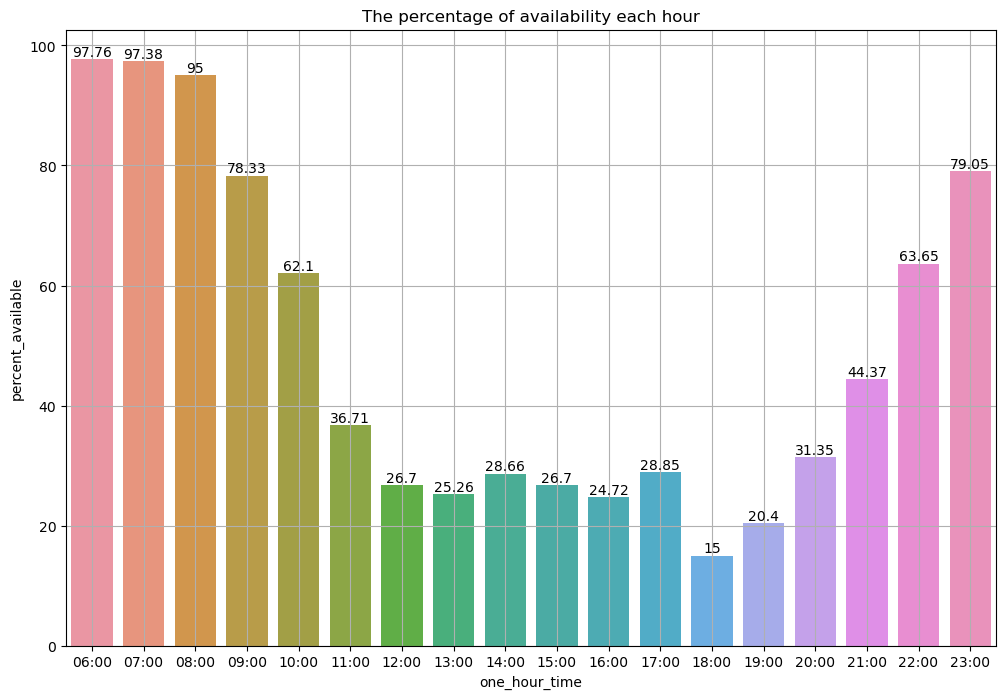

In [43]:
fig,ax = plt.subplots(figsize = (12,8))


sns.barplot(data = hour_comprise_df, x="one_hour_time", y = "percent_available")

for container in ax.containers:
    ax.bar_label(container)

plt.title("The percentage of availability each hour")
plt.grid()
plt.show()



In [44]:
# Top 5 hottest rooms:
top_hottest_room = df.groupby(by=['room','status'])["status"].count().unstack().reset_index()
top_hottest_room['percent_availability'] = round(top_hottest_room.Available / (top_hottest_room.Available + top_hottest_room.Unavailable) * 100,2)
top_hottest_room.head(5)

status,room,Available,Unavailable,percent_availability
0,257,227,650,25.88
1,258,280,597,31.93
2,305,406,471,46.29
3,306,420,457,47.89
4,356,332,545,37.86


In [45]:
top_hottest_room = top_hottest_room.sort_values(by="percent_availability")

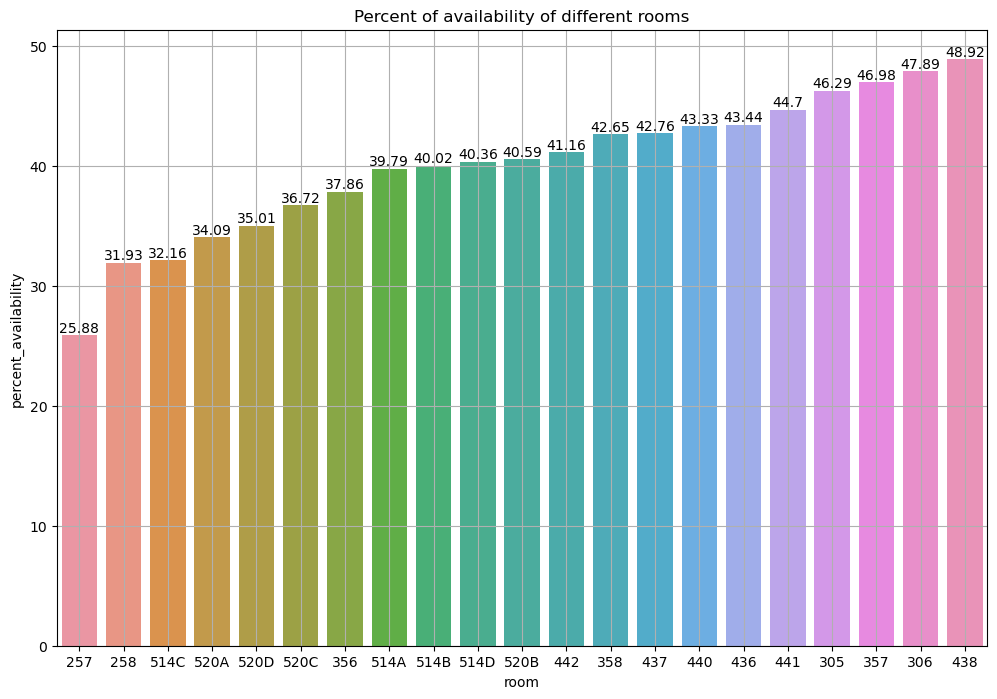

In [46]:
fig,ax = plt.subplots(figsize = (12,8))

sns.barplot(data=top_hottest_room, x='room', y= 'percent_availability', ax=ax)

for container in ax.containers:
    ax.bar_label(container)


plt.title("Percent of availability of different rooms")
plt.grid()
plt.show()

In [47]:
# To explain their popularity, I'll scrap another piece of info 
room_detail_df = pd.read_csv("Room_detail.csv")
room_detail_df.head(5)

,room,capacity,quiet_room,floor
0,257,8,False,2
1,258,8,False,2
2,305,4,False,3
3,306,4,False,3
4,356,4,False,3


In [48]:
# So now I'll add a few more columns
top_hottest_room.merge(right=room_detail_df, how="left" )

# The 2 top most popular rooms has the capacity of 8, then follow by 2-people room but is quiet (So quiet is much more important than the
# capacity)
# Other unpopular rooms are all 4 capacity rooms and not quiet

,room,Available,Unavailable,percent_availability,capacity,quiet_room,floor
0,257,227,650,25.88,8,False,2
1,258,280,597,31.93,8,False,2
2,514C,282,595,32.16,2,True,5
3,520A,299,578,34.09,2,True,5
4,520D,307,570,35.01,2,True,5
5,520C,322,555,36.72,2,True,5
6,356,332,545,37.86,4,False,3
7,514A,349,528,39.79,2,True,5
8,514B,351,526,40.02,2,True,5
9,514D,354,523,40.36,2,True,5


So now, I'll see which rooms should you book in the morning (so that mean they are available in the morning but not anymore in the 
afternoon)  
Of course, since I only scrap at 3 time stamp, I can only compare rooms from 13:00 to the end of the days

In [49]:
# So, first let see all the room that available in the morning (06:00)

room_avail_6 = df[(df.checking_hour == 6) & (df.status =="Available") ]

In [50]:
room_avail_6 = room_avail_6[["room", 'day_of_week','status']]
room_avail_6.rename(columns={'status':"status_at_6"}, inplace=True)

In [51]:
room_at_12 = df[(df.checking_hour == 12)][["room", "day_of_week","status"]]


room_at_12.rename(columns={'status':"status_at_12"},inplace=True)
room_6_12 = room_avail_6.merge(right= room_at_12, how="right", on=["room", "day_of_week"])

In [52]:
room_6_12 = room_6_12.groupby(by=["room",'status_at_6','status_at_12']
                                                            )[['status_at_6','status_at_12']
                                                            ].count(
                                                            ).rename(columns={'status_at_6':'cnt_at_6','status_at_12':'cnt_at_12'}
                                                            ).reset_index()

room_6_12['count'] = room_6_12.cnt_at_6

room_6_12 = room_6_12.drop(columns=['cnt_at_6','cnt_at_12'])

room_6_12['general_status'] = (room_6_12.status_at_6) +"-" + (room_6_12.status_at_12)

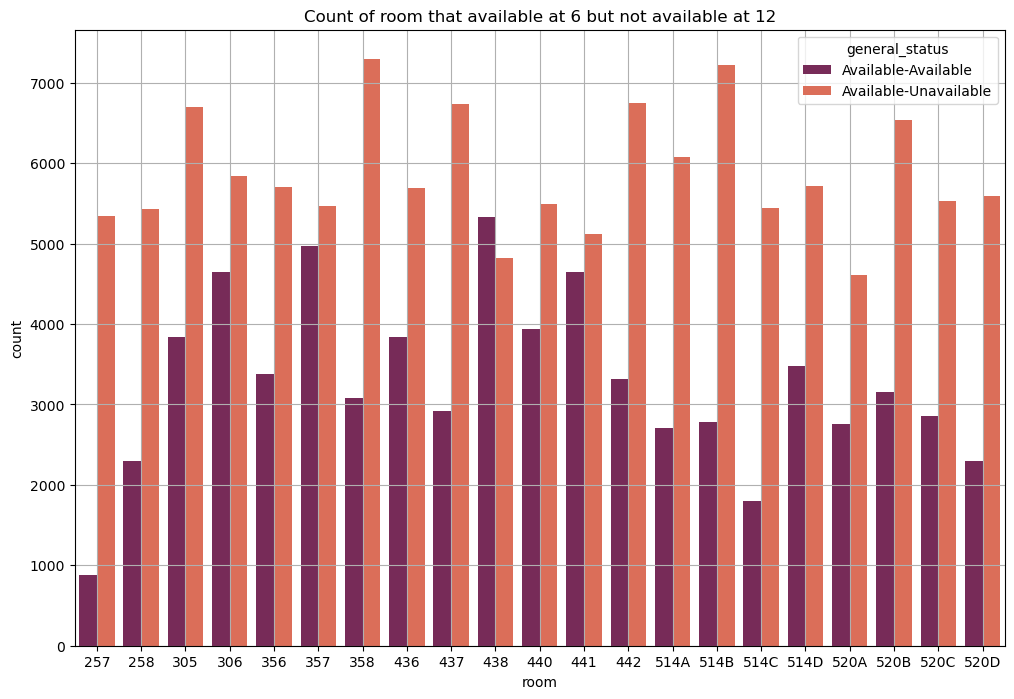

In [53]:
fig,ax = plt.subplots(figsize = (12,8))

sns.barplot(data=room_6_12, x='room', y='count', hue='general_status', ax=ax,palette='rocket')

plt.title('Count of room that available at 6 but not available at 12')
plt.grid()
plt.show()

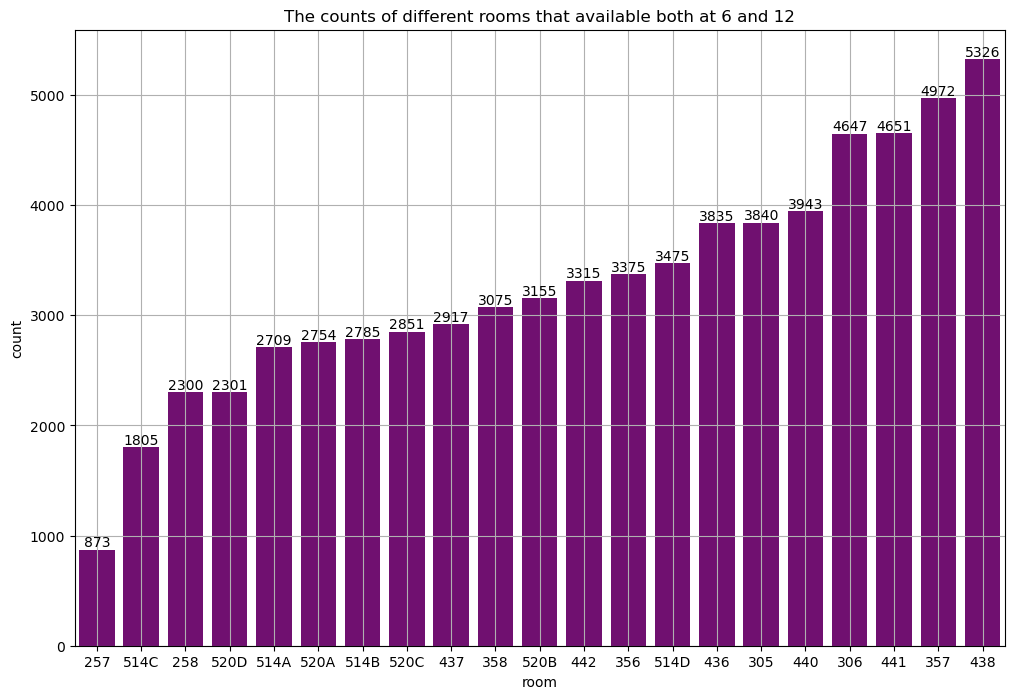

In [54]:
# Just to see the trend better
count_avail_room = room_6_12[(room_6_12.status_at_6=='Available') & (room_6_12.status_at_12=='Available')].sort_values(by='count')


fig,ax = plt.subplots(figsize = (12,8))

sns.barplot(data=count_avail_room, x='room', y='count', ax=ax,color='purple')

for container in ax.containers:
    ax.bar_label(container)

plt.title("The counts of different rooms that available both at 6 and 12")
plt.grid()
plt.show()

# It seems like room 257 is the room you want to book early in the morning, while you can sitback with room like 438


In [55]:
# Get the top 5 room of that you should book early
plot_df = pd.DataFrame(data = {'rooms should be booked early':count_avail_room.iloc[:5,:].room.values, 'rooms that are popular':top_hottest_room.iloc[:5,:].room.values})

In [56]:
plot_df # So as you can see they are quite similar 

,rooms should be booked early,rooms that are popular
0,257,257
1,514C,258
2,258,514C
3,520D,520A
4,514A,520D


In [57]:
# Let see how many percent of them are available after noon

In [58]:
room_6_12_percent = room_6_12[room_6_12.general_status == "Available-Available"]
room_6_12_percent

,room,status_at_6,status_at_12,count,general_status
0,257,Available,Available,873,Available-Available
2,258,Available,Available,2300,Available-Available
4,305,Available,Available,3840,Available-Available
6,306,Available,Available,4647,Available-Available
8,356,Available,Available,3375,Available-Available
10,357,Available,Available,4972,Available-Available
12,358,Available,Available,3075,Available-Available
14,436,Available,Available,3835,Available-Available
16,437,Available,Available,2917,Available-Available
18,438,Available,Available,5326,Available-Available


In [59]:
room_6_12_percent['total'] = room_6_12.groupby(by='room')['count'].sum().values

C:\Users\minht\AppData\Local\Temp\ipykernel_2404\3567988368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room_6_12_percent['total'] = room_6_12.groupby(by='room')['count'].sum().values


In [60]:
room_6_12_percent['percent'] = round((room_6_12_percent['count']/room_6_12_percent.total) * 100,2)

C:\Users\minht\AppData\Local\Temp\ipykernel_2404\1214216890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room_6_12_percent['percent'] = round((room_6_12_percent['count']/room_6_12_percent.total) * 100,2)


In [61]:
room_6_12_percent

,room,status_at_6,status_at_12,count,general_status,total,percent
0,257,Available,Available,873,Available-Available,6216,14.04
2,258,Available,Available,2300,Available-Available,7728,29.76
4,305,Available,Available,3840,Available-Available,10536,36.45
6,306,Available,Available,4647,Available-Available,10488,44.31
8,356,Available,Available,3375,Available-Available,9072,37.20
10,357,Available,Available,4972,Available-Available,10440,47.62
12,358,Available,Available,3075,Available-Available,10368,29.66
14,436,Available,Available,3835,Available-Available,9528,40.25
16,437,Available,Available,2917,Available-Available,9648,30.23
18,438,Available,Available,5326,Available-Available,10152,52.46


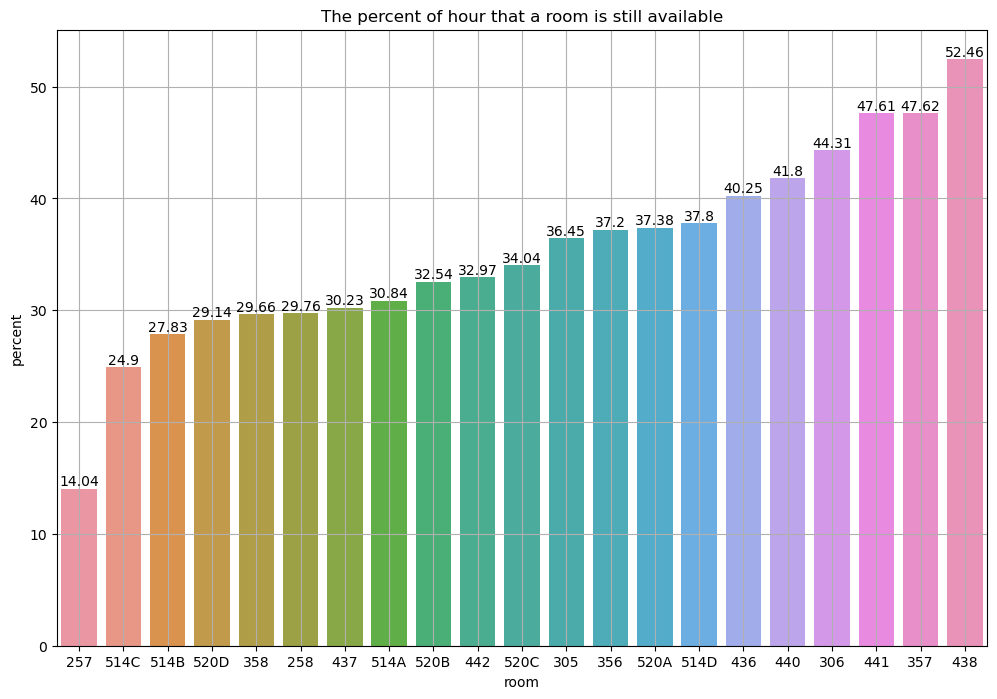

In [62]:
fig,ax = plt.subplots(figsize = (12,8))

sns.barplot(data=room_6_12_percent.sort_values(by='percent'), x='room', y='percent', ax=ax)

for container in ax.containers:
    ax.bar_label(container)

plt.title("The percent of hour that a room is still available")
plt.grid()
plt.show()

Text(0.5, 1.0, 'The count of rooms that are available at 6 and 12')

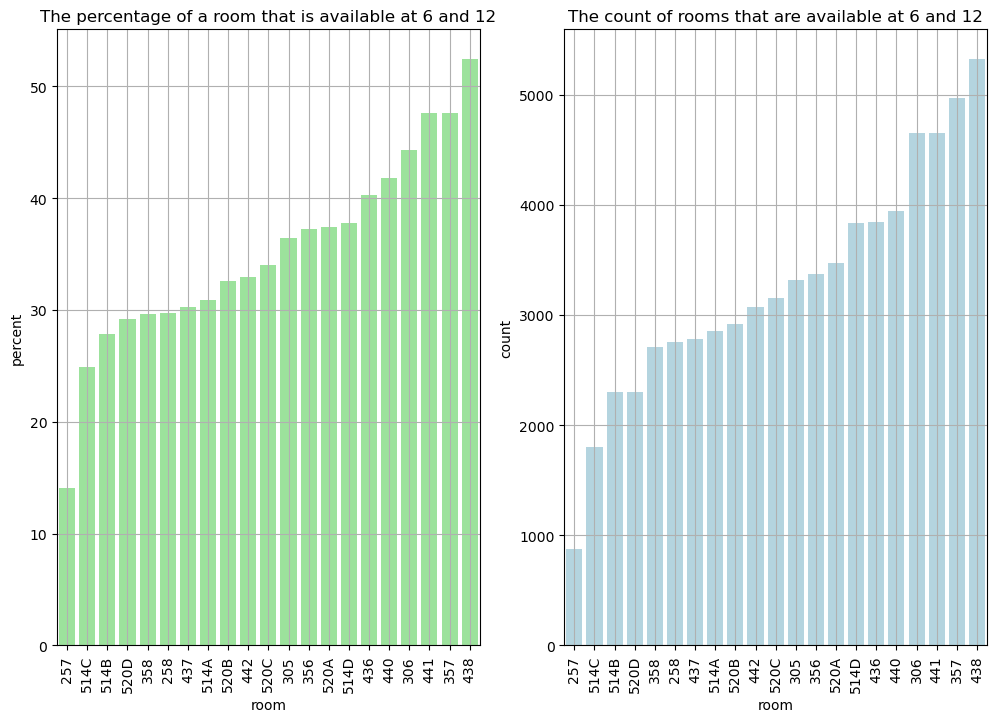

In [63]:
fig,ax = plt.subplots(1,2,figsize = (12,8))

sns.barplot(data=room_6_12_percent.sort_values(by='percent'), x='room', y='percent',ax=ax[0],color='lightgreen')
sns.barplot(data=count_avail_room, x='room', y='count',color='lightblue',ax=ax[1])

for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)

for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)

ax[1].set_xticklabels(labels = ax[0].get_xticklabels())

ax[0].grid()
ax[1].grid()

ax[0].set_title("The percentage of a room that is available at 6 and 12")
ax[1].set_title("The count of rooms that are available at 6 and 12")

# While there are slight different between the rooms, the trend percent of available and the count is quite similar, w

## Modelling

In [64]:
modelling_df = df.drop(columns=['date','one_hour_time'])
modelling_df

,checking_hour,hour,day_of_week,room,status
0,6,12:00,Monday,436,Unavailable
1,6,12:15,Monday,436,Unavailable
2,6,15:00,Monday,436,Unavailable
3,6,11:30,Monday,436,Unavailable
4,6,12:30,Monday,436,Unavailable
...,...,...,...,...,...
18412,12,21:00,Sunday,520D,Available
18413,12,21:15,Sunday,520D,Available
18414,12,21:30,Sunday,520D,Available
18415,12,19:15,Sunday,520D,Available


In [65]:
modelling_df['minute'] = pd.to_datetime(modelling_df.hour).dt.minute
modelling_df['hour'] = pd.to_datetime(modelling_df.hour).dt.hour

# Rearrange the order of columns
modelling_df = modelling_df[['checking_hour', 'hour','minute', 'day_of_week', 'room','status']]

In [67]:
modelling_df.dtypes

checking_hour       int64
hour                int64
minute              int64
day_of_week      category
room             category
status           category
dtype: object

In [68]:
# Split test and y for training and testing
X = modelling_df.iloc[:,:-1]
y = modelling_df.iloc[:,-1]

In [69]:
y  = y.map(lambda x: 1 if (x == "Available") else 0)

In [70]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y)

In [71]:
X_train

,checking_hour,hour,minute,day_of_week,room
7376,6,18,30,Wednesday,520C
12819,6,13,15,Friday,514A
10958,6,12,15,Thursday,514B
1662,12,20,15,Monday,514C
13856,12,12,0,Friday,436
...,...,...,...,...,...
4049,6,12,0,Tuesday,520D
16914,6,19,0,Sunday,442
15426,6,15,15,Saturday,306
8406,12,21,30,Wednesday,356


In [72]:
X_train = pd.get_dummies(X_train, columns=["day_of_week","room"])
X_test = pd.get_dummies(X_test, columns=["day_of_week","room"])

In [73]:
X_test.dtypes

checking_hour            int64
hour                     int64
minute                   int64
day_of_week_Friday       uint8
day_of_week_Monday       uint8
day_of_week_Saturday     uint8
day_of_week_Sunday       uint8
day_of_week_Thursday     uint8
day_of_week_Tuesday      uint8
day_of_week_Wednesday    uint8
room_257                 uint8
room_258                 uint8
room_305                 uint8
room_306                 uint8
room_356                 uint8
room_357                 uint8
room_358                 uint8
room_436                 uint8
room_437                 uint8
room_438                 uint8
room_440                 uint8
room_441                 uint8
room_442                 uint8
room_514A                uint8
room_514B                uint8
room_514C                uint8
room_514D                uint8
room_520A                uint8
room_520B                uint8
room_520C                uint8
room_520D                uint8
dtype: object

In [74]:
import xgboost as xgb

c:\Users\minht\.conda\envs\DataScience\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [75]:
from tabnanny import verbose
from sklearn.metrics import f1_score

reg = xgb.XGBClassifier(
    objective = "binary:logistic",
    n_estimator = 1000,
    verbosity = 0,
    eval_metric = 'error',
    early_stopping_rounds = 10,
    silent=True,
)

reg.fit(X_train,y_train, eval_set=[(X_train,y_train),(X_test,y_test)])


[0]	validation_0-error:0.14944	validation_1-error:0.16113
[1]	validation_0-error:0.14654	validation_1-error:0.15396
[2]	validation_0-error:0.14306	validation_1-error:0.15505
[3]	validation_0-error:0.13561	validation_1-error:0.14788
[4]	validation_0-error:0.13351	validation_1-error:0.14484
[5]	validation_0-error:0.13257	validation_1-error:0.14506
[6]	validation_0-error:0.13068	validation_1-error:0.14311
[7]	validation_0-error:0.12960	validation_1-error:0.14354
[8]	validation_0-error:0.12764	validation_1-error:0.14202
[9]	validation_0-error:0.12438	validation_1-error:0.14028
[10]	validation_0-error:0.12337	validation_1-error:0.13985


c:\Users\minht\.conda\envs\DataScience\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\minht\.conda\envs\DataScience\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-error:0.12091	validation_1-error:0.13768
[12]	validation_0-error:0.11830	validation_1-error:0.13290
[13]	validation_0-error:0.11664	validation_1-error:0.13095
[14]	validation_0-error:0.11237	validation_1-error:0.13029
[15]	validation_0-error:0.11092	validation_1-error:0.12530
[16]	validation_0-error:0.10911	validation_1-error:0.12617
[17]	validation_0-error:0.10824	validation_1-error:0.12595
[18]	validation_0-error:0.10592	validation_1-error:0.12400
[19]	validation_0-error:0.10411	validation_1-error:0.12291
[20]	validation_0-error:0.10216	validation_1-error:0.11987
[21]	validation_0-error:0.10165	validation_1-error:0.11900
[22]	validation_0-error:0.10107	validation_1-error:0.11792
[23]	validation_0-error:0.09904	validation_1-error:0.11683
[24]	validation_0-error:0.09716	validation_1-error:0.11661
[25]	validation_0-error:0.09550	validation_1-error:0.11531
[26]	validation_0-error:0.09405	validation_1-error:0.11118
[27]	validation_0-error:0.09260	validation_1-error:0.110

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='error', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=1000, n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=1, tree_method='exact', ...)

In [76]:
y_predict = reg.predict(X_test)
y_predict

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_true= y_test, y_pred=y_predict))
print(classification_report(y_true=y_test, y_pred = y_predict))

[[2638  103]
 [ 242 1622]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2741
           1       0.94      0.87      0.90      1864

    accuracy                           0.93      4605
   macro avg       0.93      0.92      0.92      4605
weighted avg       0.93      0.93      0.92      4605



In [78]:
# Cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

In [79]:
# Convert the dependent to 1 and 0
modelling_df.status = modelling_df.status.map(lambda x: 1 if (x=="Available") else 0)

# Convert modeliling_df to dummy
modelling_df = pd.get_dummies(data=modelling_df, columns=['day_of_week', 'room'])


In [83]:
modelling_df.columns

Index(['checking_hour', 'hour', 'minute', 'status', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'room_257', 'room_258', 'room_305', 'room_306', 'room_356', 'room_357',
       'room_358', 'room_436', 'room_437', 'room_438', 'room_440', 'room_441',
       'room_442', 'room_514A', 'room_514B', 'room_514C', 'room_514D',
       'room_520A', 'room_520B', 'room_520C', 'room_520D'],
      dtype='object')

In [85]:
X = modelling_df.drop('status', axis=1)
y = modelling_df.status


In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 

In [89]:
# Models Dictionary 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

model_dict = {
    'Logreg': LogisticRegression(),
    'sgd': SGDClassifier(),
    'naive': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'adaboost': AdaBoostClassifier(),
    'svm': SVC(),
    'gbc': GradientBoostingClassifier(),
    'quadra': QuadraticDiscriminantAnalysis(),
    'xgb': xgb.XGBClassifier(objective="binary:logistic")
}

In [90]:
def train_and_score(model_dict, X, y, scoring=None, save_model = False):

    from sklearn.model_selection import cross_val_score
    score_df = pd.DataFrame(columns=['Model', 'Score', 'Std'])
    for name, model in model_dict.items():
        # Train the model
        model.fit(X, y)
        # Calculate the score
        if scoring == None:
            scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error') 
            scores = np.sqrt(-scores)
        else:
            scores = cross_val_score(model, X, y, scoring=scoring)       
        
        # Add the score to the score_df
        adding_df = pd.DataFrame({'Model': [name], 'Score': [scores.mean()], 'Std':[scores.std()]})
        score_df = pd.concat([score_df, adding_df])  
        # Print information      
        print('{}:'.format(name))
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())
        print('---------------------')
        # Save the results
        if save_model == True:
            import pickle
            with open(f'{name}_baseline.pkl','wb') as f:
                pickle.dump(model,f)
        
    # Sort the dataset and reset the index
    score_df = score_df.sort_values(by='Score').reset_index(drop=True)
    # Return the result
    return score_df

In [ ]:
# you can uncomment to run the training process
# score_df = train_and_score(model_dict, X_train, y_train, scoring='accuracy')

In [92]:
score_df

,Model,Score,Std
0,sgd,0.682665,0.033402
1,Logreg,0.710541,0.007920
2,naive,0.735012,0.012117
3,quadra,0.752822,0.011501
4,svm,0.793659,0.008817
5,knn,0.838039,0.006843
6,adaboost,0.841443,0.007285
7,gbc,0.860267,0.005352
8,tree,0.920215,0.007499
9,xgb,0.922676,0.005811


In [93]:
# Tune the random forest model:

from sklearn.model_selection import GridSearchCV
# Random Forest Classifier
rfc = RandomForestClassifier()
param_grid = [{
    'bootstrap': [True, False],
    'max_depth': [10, 30, 50, 100],
    'max_features': ['log2', 'sqrt'],
    'n_estimators': [10, 50, 100]
}]
grid_search = GridSearchCV(rfc, param_grid, cv = 5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)